Oscar Miguel Ortega Lozano - 2220528

Laura Camila Diaz Delgado - 222...

Juan David Toloza Parada - 222...

In [1]:
#@title Libs
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from scipy import stats

url1 = 'https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/Images/playoffs.png'
filename = 'playoffs.png'
response = requests.get(url1)
with open(filename, 'wb') as f:
    f.write(response.content)


In [2]:
#@title Load dataset
df = pd.read_csv('https://raw.githubusercontent.com/LauraCD2/estadisticos/refs/heads/main/2023_nba_player_stats.csv')
df['POS'] = df['POS'].fillna('PF') #Limpiamos registros vacios.
print('Shape:',df.shape)
df.head(12)

Shape: (539, 30)


,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
0,Jayson Tatum,SF,BOS,25,74,52,22,2732.2,2225,727,...,649,342,213,78,51,160,3691,31,1,470
1,Joel Embiid,C,PHI,29,66,43,23,2284.1,2183,728,...,670,274,226,66,112,205,3706,39,1,424
2,Luka Doncic,PG,DAL,24,66,33,33,2390.5,2138,719,...,569,529,236,90,33,166,3747,36,10,128
3,Shai Gilgeous-Alexander,PG,OKC,24,68,33,35,2416.0,2135,704,...,329,371,192,112,65,192,3425,3,0,149
4,Giannis Antetokounmpo,PF,MIL,28,63,47,16,2023.6,1959,707,...,742,359,246,52,51,197,3451,46,6,341
5,Anthony Edwards,SG,MIN,21,79,40,39,2841.5,1946,707,...,458,350,259,125,58,186,3311,9,0,97
6,Julius Randle,PF,NYK,28,77,44,33,2737.3,1936,658,...,767,316,216,49,21,233,3324,40,0,170
7,Donovan Mitchell,SG,CLE,26,68,44,24,2432.4,1922,679,...,289,301,180,99,27,168,2918,5,0,338
8,Trae Young,PG,ATL,24,73,38,35,2540.7,1914,597,...,217,741,300,80,9,104,3253,40,0,100
9,Zach LaVine,SG,CHI,28,77,38,39,2767.9,1913,673,...,345,327,194,69,18,159,2885,2,0,18


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539 entries, 0 to 538
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PName   539 non-null    object 
 1   POS     539 non-null    object 
 2   Team    539 non-null    object 
 3   Age     539 non-null    int64  
 4   GP      539 non-null    int64  
 5   W       539 non-null    int64  
 6   L       539 non-null    int64  
 7   Min     539 non-null    float64
 8   PTS     539 non-null    int64  
 9   FGM     539 non-null    int64  
 10  FGA     539 non-null    int64  
 11  FG%     539 non-null    float64
 12  3PM     539 non-null    int64  
 13  3PA     539 non-null    int64  
 14  3P%     539 non-null    float64
 15  FTM     539 non-null    int64  
 16  FTA     539 non-null    int64  
 17  FT%     539 non-null    float64
 18  OREB    539 non-null    int64  
 19  DREB    539 non-null    int64  
 20  REB     539 non-null    int64  
 21  AST     539 non-null    int64  
 22  TO

---

Nuestro Dataset contiene las estadísticas de cada jugador de la NBA durante la temporada regular del 2023.

PName: El nombre del jugador  
POS: La posición del jugador  
Team: La abreviatura del equipo en el que juega actualmente el jugador esta temporada  
Age: La edad del jugador  
GP: El número total de juegos que ha jugado el jugador en esta temporada  
W: El número total de juegos ganados por el jugador  
L: El número total de juegos perdidos por el jugador  
Min: El total de minutos que ha jugado el jugador en esta temporada  
PTS: El total de puntos anotados por el jugador [objetivo]  
FGM: El número total de tiros de campo encestados por el jugador  
FGA: El número total de tiros de campo intentados por el jugador  
FG%: El porcentaje de tiros de campo encestados por el jugador  
3PM: El número total de triples encestados por el jugador  
3PA: El número total de triples intentados por el jugador  
3P%: El porcentaje de triples encestados por el jugador  
FTM: El número total de tiros libres encestados por el jugador  
FTA: El número total de tiros libres intentados por el jugador  
FT%: El porcentaje de tiros libres encestados por el jugador  
OREB: El número total de rebotes ofensivos realizados por el jugador  
DREB: El número total de rebotes defensivos realizados por el jugador  
REB: El número total de rebotes (ofensivos + defensivos) realizados por el jugador  
AST: El número total de asistencias realizadas por el jugador  
TOV: El número total de pérdidas de balón del jugador  
STL: El número total de robos realizados por el jugador  
BLK: El número total de bloqueos realizados por el jugador  
PF: El número total de faltas personales cometidas por el jugador  
FP: El total de puntos de fantasía NBA obtenidos por el jugador  
DD2: El número total de doble-dobles realizados por el jugador  
TD3: El número total de triple-dobles realizados por el jugador  
+/-: La diferencia total entre los puntos anotados por el equipo del jugador y los puntos del equipo contrario mientras el jugador está en la cancha  

Para más información revise el siguiente link: [https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season](https://www.kaggle.com/datasets/amirhosseinmirzaie/nba-players-stats2023-season)

<Axes: >

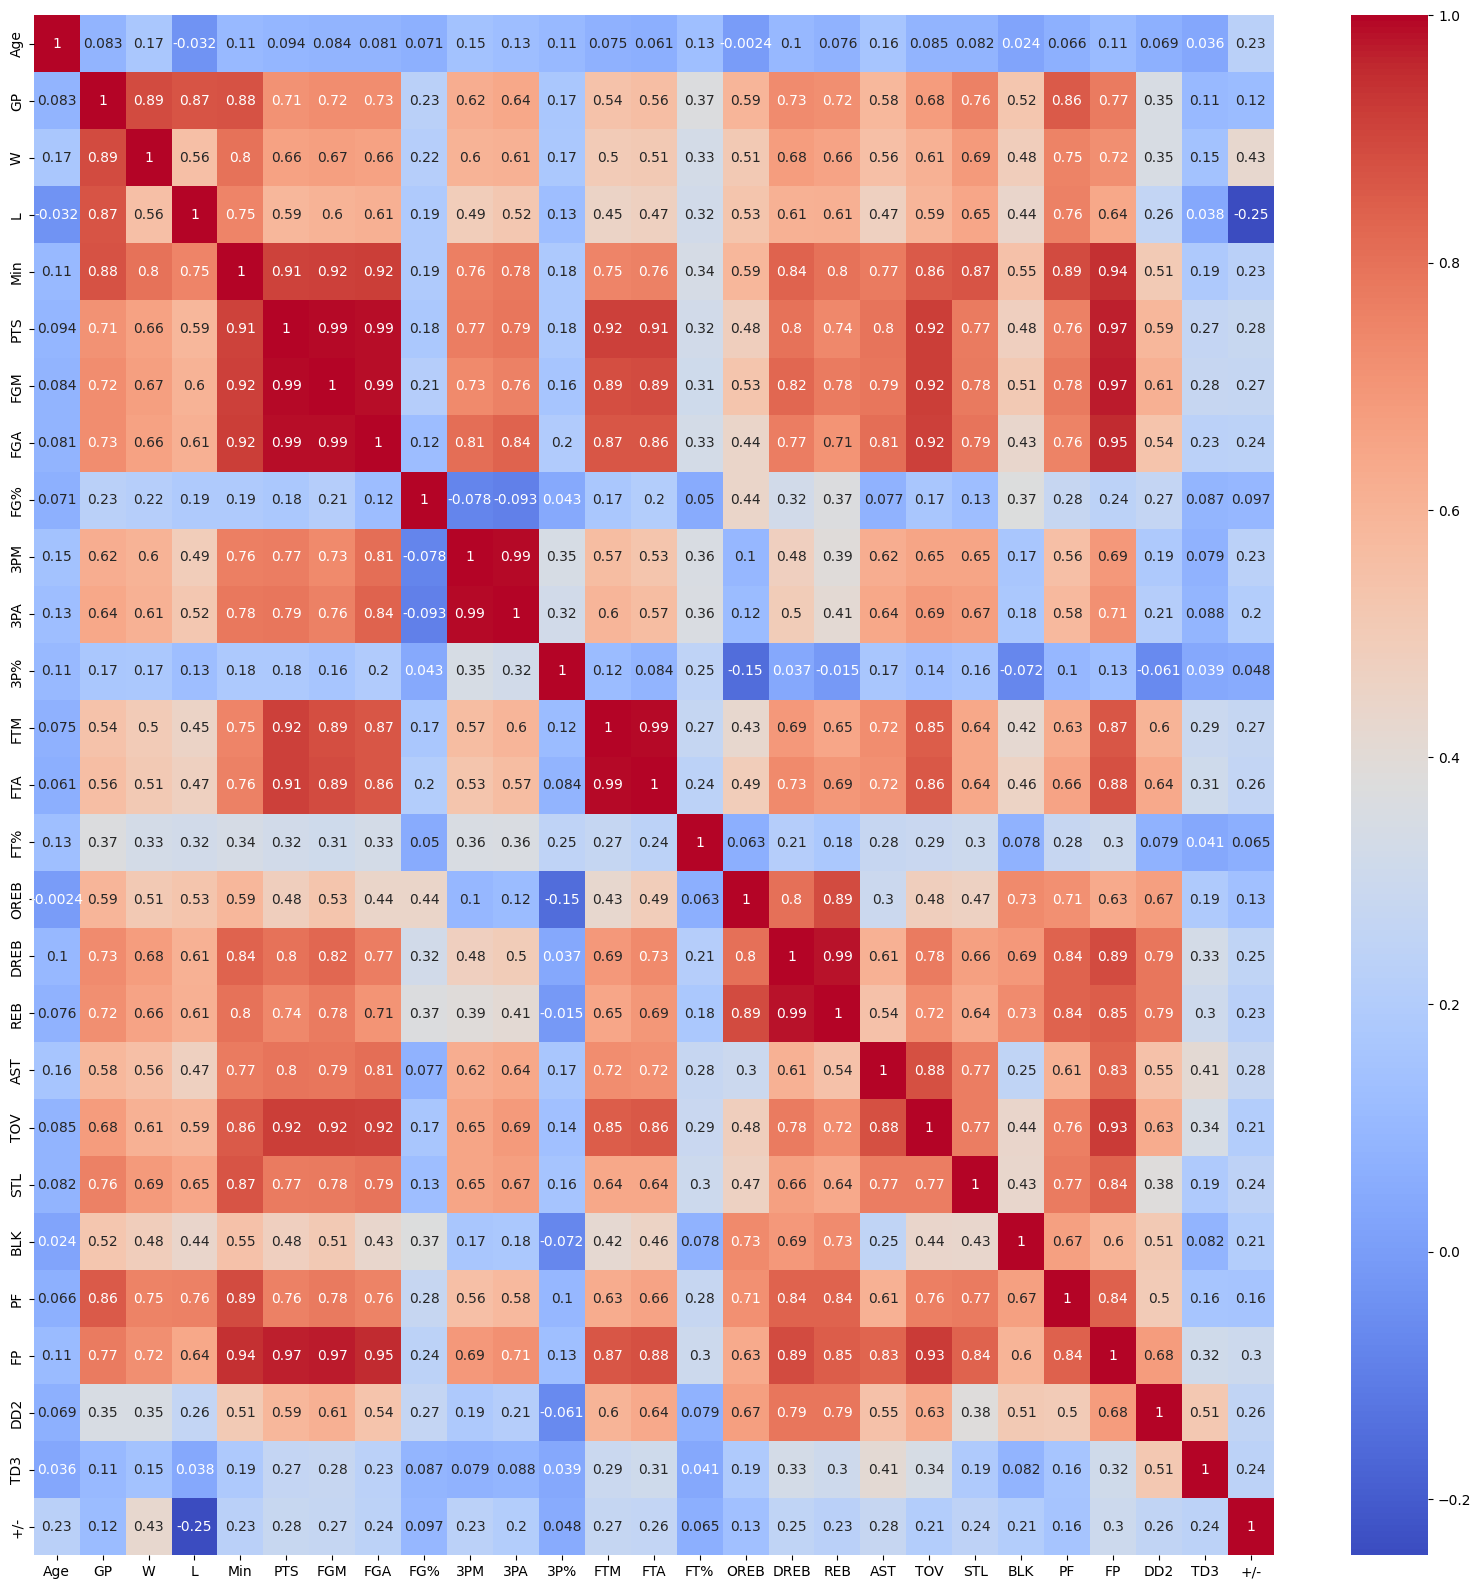

In [4]:
#@title Correlación
corr_mat = df.iloc[:,3:].corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm")

## Funciones

### Prueba de hipotesis

In [5]:
#@title Una muestra, varianza conocida
def prueba_hipotesis_completa(x_barra, mu_0, sigma, n, alpha, cola, x_sup):
    Z = (x_barra - mu_0) / (sigma / np.sqrt(n))
    x = np.linspace(-20, 20, 1000)
    y = norm.pdf(x, 0, 1)


    if cola == 'inf':
      z = norm.ppf(alpha)
      if Z < z:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('punto crítico', z)

      p = norm.cdf(Z)
      print('p-valor:', p)

      beta = 1 - norm.cdf(z - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta:', beta)

      cota_superior = x_barra + z * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x <= z), color='red')
      plt.axvline(z, color='black', linestyle='dotted')
      plt.axvline(Z, color='green', linestyle='--')


    if cola == 'sup':
      z = norm.ppf(1-alpha)
      if Z > z:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('punto crítico', z)

      p = 1 - norm.cdf(Z)
      print('p-valor', p)

      beta = norm.cdf(z - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta', beta)

      cota_superior = x_barra + z * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5)
      plt.axvline(z, color='black', linestyle='dotted')
      plt.axvline(Z, color='green', linestyle='--')

    if cola == 'dos':
      z_medio = norm.ppf(1 - alpha / 2)
      if abs(Z) > z_medio:
        print('Se rechaza Ho bajo', alpha)
      else:
        print('No se puede rechazar Ho bajo', alpha)

      print('puntos críticos', -z_medio, z_medio)

      p = 2 * (1 - norm.cdf(abs(Z)))
      print('p-valor', p)

      beta = norm.cdf(z_medio - (x_sup - mu_0)/(sigma/np.sqrt(n))) - norm.cdf(-z_medio - (x_sup - mu_0)/(sigma/np.sqrt(n)))
      print('beta', beta)

      cota_superior = x_barra + z_medio * (sigma / np.sqrt(n))
      cota_inferior = x_barra - z_medio * (sigma / np.sqrt(n))
      print('intervalo de confianza', cota_inferior, cota_superior)

      plt.fill_between(x, y, where=(x <= -z_medio), color='red', alpha=0.5)
      plt.fill_between(x, y, where=(x >= z_medio), color='red', alpha=0.5)
      plt.axvline(Z, color='green', linestyle='--')
      plt.axvline(-z_medio, color='black', linestyle='dotted')
      plt.axvline(z_medio, color='black', linestyle='dotted')
      plt.axvline(-z_medio, color='black', linestyle='dotted')
      plt.axvline(z_medio, color='black', linestyle='dotted')

    print('estadístico', Z)
    plt.show()

In [6]:
#@title Dos muestras, varianza conocida
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def prueba_hipotesis_2muestrasZ(x_barra1, x_barra2, var1, var2, n1, n2, alpha, cola, delta=0):
    sigma = np.sqrt((var1 / n1) + (var2 / n2))
    Z = (x_barra1 - x_barra2 - delta) / sigma
    x = np.linspace(-10, 10, 1000)
    y = norm.pdf(x, 0, 1)

    if cola == 'inf':
        z = norm.ppf(alpha)
        if Z < z:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Punto crítico:', z)

        p = norm.cdf(Z)
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z * sigma
        cota_inferior = (x_barra1 - x_barra2) - z * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x <= z), color='red', alpha=0.5)
        plt.axvline(z, color='black', linestyle='dotted')
        plt.axvline(Z, color='green', linestyle='--')

    elif cola == 'sup':
        z = norm.ppf(1 - alpha)
        if Z > z:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Punto crítico:', z)

        p = 1 - norm.cdf(Z)
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z * sigma
        cota_inferior = (x_barra1 - x_barra2) - z * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x >= z), color='red', alpha=0.5)
        plt.axvline(z, color='black', linestyle='dotted')
        plt.axvline(Z, color='green', linestyle='--')

    elif cola == 'dos':
        z_medio = norm.ppf(1 - alpha / 2)
        if abs(Z) > z_medio:
            print('Se rechaza Ho bajo', alpha)
        else:
            print('No se puede rechazar Ho bajo', alpha)

        print('Puntos críticos:', -z_medio, z_medio)

        p = 2 * (1 - norm.cdf(abs(Z)))
        print('p-valor:', p)

        cota_superior = (x_barra1 - x_barra2) + z_medio * sigma
        cota_inferior = (x_barra1 - x_barra2) - z_medio * sigma
        print('Intervalo de confianza:', cota_inferior, cota_superior)

        plt.fill_between(x, y, where=(x <= -z_medio), color='red', alpha=0.5)
        plt.fill_between(x, y, where=(x >= z_medio), color='red', alpha=0.5)
        plt.axvline(Z, color='green', linestyle='--')
        plt.axvline(-z_medio, color='black', linestyle='dotted')
        plt.axvline(z_medio, color='black', linestyle='dotted')

    print('Estadístico:', Z)
    plt.show()


In [7]:
#@title Dos muestras, varianza desconocida
def prueba_hipotesis_2muestrasT(x_barra1, x_barra2, var1, var2, n1, n2, alpha, cola, delta=0, var='iguales'):
  if var == 'iguales':
    v = n1 + n2 -2
    Sp = np.sqrt(((n1 - 1)*var1 + (n2 - 1)*var2)/v)
    sigma = Sp*np.sqrt((1/n1) + (1/n2))
    print('varianza combinada', Sp**2, 'grados de libertad', v)
  if var == 'distinta':
    v = (var1/n1 + var2/n2)**2 / ((var1/n1)**2/(n1-1) + (var2/n2)**2/(n2-1))
    sigma = np.sqrt((var1/n1) + (var2/n2))
    print('grados de libertad', v)

  T = (x_barra1 - x_barra2 - delta) / sigma
  x = np.linspace(-10, 10, 1000)
  y = norm.pdf(x, 0, 1)

  if cola == 'inf':
    t = stats.t.ppf(alpha, v)
    if T < t:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('punto crítico:', t)

    p = norm.cdf(T)
    print('p-valor:', p)

    cota_superior = (x_barra1 - x_barra2) + t * sigma
    cota_inferior = (x_barra1 - x_barra2) - t * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x <= t), color='red')
    plt.axvline(t, color='black', linestyle='dotted')
    plt.axvline(T, color='green', linestyle='--')

  if cola == 'sup':
    t = stats.t.ppf(1 - alpha, v)
    if T > t:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('punto crítico:', t)


    p_valor = 1 - norm.cdf(T)
    print('p-valor:', p_valor)

    cota_superior = (x_barra1 - x_barra2) + t * sigma
    cota_inferior = (x_barra1 - x_barra2) - t * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x >= t), color='red', alpha=0.5)
    plt.axvline(t, color='black', linestyle='dotted')
    plt.axvline(T, color='green', linestyle='--')


  if cola == 'dos':
    t_medio = stats.t.ppf(1 - alpha / 2, v)
    if abs(T) > t_medio:
      print('Se rechaza Ho bajo', alpha)
    else:
      print('No se puede rechazar Ho bajo', alpha)

    print('puntos críticos', -t_medio, t_medio)

    p = 2 * (1 - norm.cdf(abs(T)))
    print('p-valor', p)

    cota_superior = (x_barra1 - x_barra2) + t_medio * sigma
    cota_inferior = (x_barra1 - x_barra2) - t_medio * sigma
    print('Intervalo de confianza:', cota_inferior, cota_superior)

    plt.fill_between(x, y, where=(x <= -t_medio), color='red', alpha=0.5)
    plt.fill_between(x, y, where=(x >= t_medio), color='red', alpha=0.5)
    plt.axvline(T, color='green', linestyle='--')
    plt.axvline(-t_medio, color='black', linestyle='dotted')
    plt.axvline(t_medio, color='black', linestyle='dotted')

  print('Estadístico:', T)
  plt.show()

### Regresion

In [8]:
def regresion(x, y, alpha, z):
  # algunos valores
  n = np.size(x)
  sum_xy = np.sum(x * y)
  sum_x = np.sum(x)
  sum_y = np.sum(y)
  sum_x2 = np.sum(x ** 2)
  # print('sum_x2 es', sum_x2)
  x_barra = np.sum(x) / n
  # print('x_barra es', x_barra)
  y_barra = np.sum(y) / n
  SXY = sum_xy - (sum_y * sum(x)) / (n)
  SXX = sum_x2 - (sum_x ** 2) / (n)
  # print('SXY es', SXY)
  # print('SXX es', SXX)

  # coeficientes y recta
  B1 = SXY / SXX
  B0 = y_barra - B1 * x_barra
  y_estimados = B0 + B1 * x  # grafica
  print("Mi recta de regresion es", B0, '+', B1, 'x')
  print('B0 es', B0, 'y B1 es', B1)

  # Estimación sigma2
  SSE = np.sum(y**2) - B0*np.sum(y) - B1*np.sum(x*y)
  print('SSE es', SSE)
  sigma2 = SSE/(n-2)
  print('sigma2 es', sigma2)
  sigma = np.sqrt(sigma2)
  print('sigma es', sigma)

  #parámetros de B0, B1
  var_B1 = sigma2 / SXX
  print('var_B1 es', var_B1)
  var_B0 = (sigma2*sum(x**2)) / (n*SXX)
  print('var_B0 es', var_B0)
  std_B1 = np.sqrt(var_B1)
  print('std_B1 es', std_B1)
  std_B0 = np.sqrt(var_B0)
  print('std_B0 es', std_B0)
  cov_B1B0 = -(x_barra*sigma2)/(n*SXX)
  print('cov de B0 y B1 es', cov_B1B0)

  #intervalos de confianza
  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  supB1 = B1 + t_medio*std_B1
  infB1 = B1 - t_medio*std_B1
  print('La cota superior para B1 es', supB1)
  print('La cota inferior para B1 es', infB1)
  y_estimadosSup = B0 + supB1*x
  y_estimadosInf = B0 + infB1*x

  #intervalo de predicción para Y
  y_estimado = B0 + B1*z
  print('y estimado para x = ',z,':', y_estimado)
  supY = y_estimado + t_medio*sigma*(np.sqrt(1 + 1/n + (z - x_barra)**2/SXX))
  infY = y_estimado - t_medio*sigma*(np.sqrt(1 + 1/n + (z - x_barra)**2/SXX))
  print('La cota superior para Y es', supY)
  print('La cota inferior para Y es', infY)


  #Correlacion
  SYY = np.sum((y - y_barra)**2)
  print("SYY:", SYY)
  r = SXY/np.sqrt(SXX*SYY)
  print("r es",r)

  return B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf, y_estimado, supY, infY


## Ejercicio de regresión  (toca arreglar las graficas de los intervalos, el punto del y_pred queda mal)

In [9]:
#@title Variables
#@markdown Relación entre las variables $x$ (Minutos jugados) y $y$ (Puntos anotados)
x = df['Min'].astype(int)
print('Primeras 10 filas\n')
print('x=',np.array(x[:10]))
y = df['PTS'].astype(int)
print('\ny=',np.array(y[:10]))

Primeras 10 filas

x= [2732 2284 2390 2416 2023 2841 2737 2432 2540 2767]

y= [2225 2183 2138 2135 1959 1946 1936 1922 1914 1913]


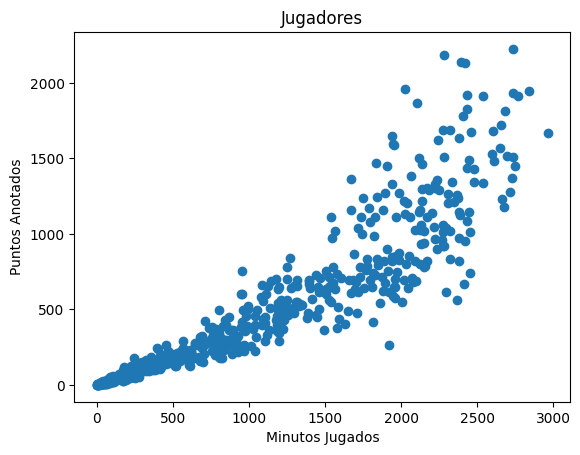

In [10]:
#@title Gráfica de dispersión
plt.plot(x, y, 'o')
plt.title('Jugadores')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Anotados')
plt.show()

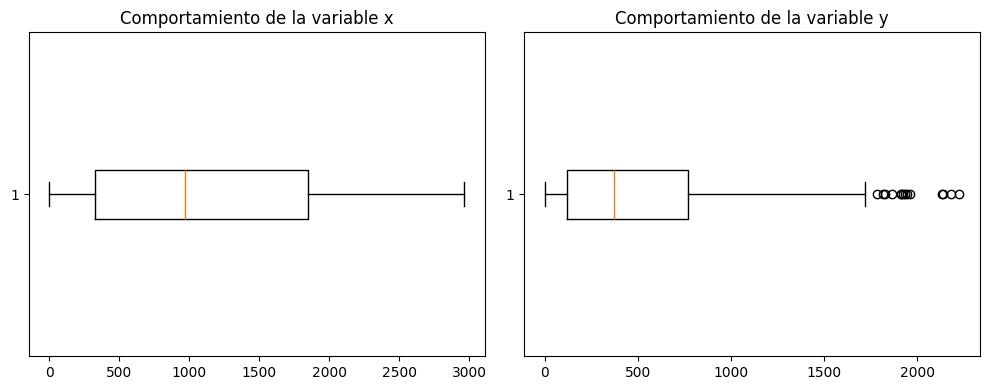

In [11]:
#@title Comportamiento de las variables
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(x, vert=False)
plt.title('Comportamiento de la variable x')
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=False)
plt.title('Comportamiento de la variable y')

plt.tight_layout()
plt.show()

In [12]:
try:
  x = np.array(x)
  y = np.array(y)

  B0, B1, y_estimados, SSE, sigma2, sigma, SXX, var_B1, var_B0, std_B1, std_B0, cov_B1B0, supB1, infB1, y_estimadosSup, y_estimadosInf, y_estimado, supY, infY = regresion(x, y, 0.05, 45)

except KeyError as e:
  print(f"Error: Column not found in DataFrame: {e}")
except Exception as e:
  print(f"Error processing data: {e}")

Mi recta de regresion es -79.36238380901568 + 0.5464141620104934 x
B0 es -79.36238380901568 y B1 es 0.5464141620104934
SSE es 23410422.585864305
sigma2 es 43594.82790663744
sigma es 208.79374489346523
var_B1 es 0.00011826211849657867
var_B0 es 224.80471732130485
std_B1 es 0.010874838780256867
std_B0 es 14.99348916434413
cov de B0 y B1 es -0.0002420473503782881
La cota superior para B1 es 0.5677766020713699
La cota inferior para B1 es 0.5250517219496169
y estimado para x =  45 : -54.773746518543476
La cota superior para Y es 356.3810768603401
La cota inferior para Y es -465.92856989742705
SYY: 133471359.85528755
r es 0.9080767594069145


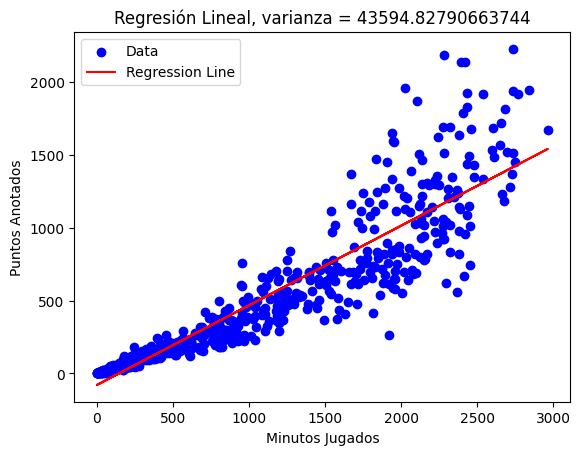

In [13]:
plt.scatter(x, y, color='blue', label='Data')
plt.plot(x, y_estimados, color='red', label='Regression Line')
plt.xlabel('Minutos Jugados')
plt.ylabel('Puntos Anotados')
plt.title(f'Regresión Lineal, varianza = {sigma2}')
plt.legend()
plt.show()

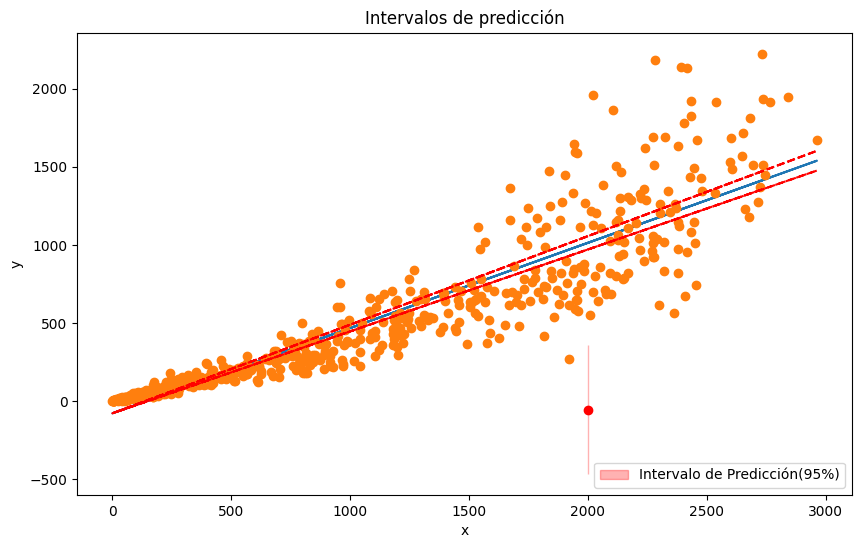

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(x, y_estimados)
plt.plot(x, y, 'o')
plt.plot(x, y_estimadosSup, color='red', linestyle='--')
plt.plot(x, y_estimadosInf, color='red', linestyle='--')
plt.scatter(2000, y_estimado, color='red')
plt.fill_between(np.array([2000]), infY, supY, color='red', alpha=0.3, label='Intervalo de Predicción(95%)')
plt.legend(loc='lower right')
plt.title('Intervalos de predicción')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [15]:
#@title Simulación
def simulate_regression_lines(x, y, sigma, num_simulations=3,):
    n = len(x)
    slopes = []
    intercepts = []

    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, label="Datos Reales", color="blue")

    # Modelo base sin ruido (regresión real)
    model_real = LinearRegression()
    model_real.fit(x.reshape(-1, 1), y)
    y_real = model_real.predict(x.reshape(-1, 1))
    plt.plot(x, y_real, color="black", label="Real", linewidth=2)

    for i in range(num_simulations):
        # Generar errores aleatorios con distribución N(0, sigma)
        errors = np.random.normal(loc=0, scale=sigma, size=n)
        y_simulated = y + errors

        # Ajustar la regresión lineal con los datos perturbados
        model_sim = LinearRegression()
        model_sim.fit(x.reshape(-1, 1), y_simulated)

        slopes.append(model_sim.coef_[0])
        intercepts.append(model_sim.intercept_)

        # Dibujar la línea simulada
        y_simulated_line = intercepts[i] + slopes[i] * x
        plt.plot(x, y_simulated_line, alpha=0.8, label=f"Simulada {i+1}")

    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Familia de rectas con error modelado")
    plt.legend()
    plt.show()

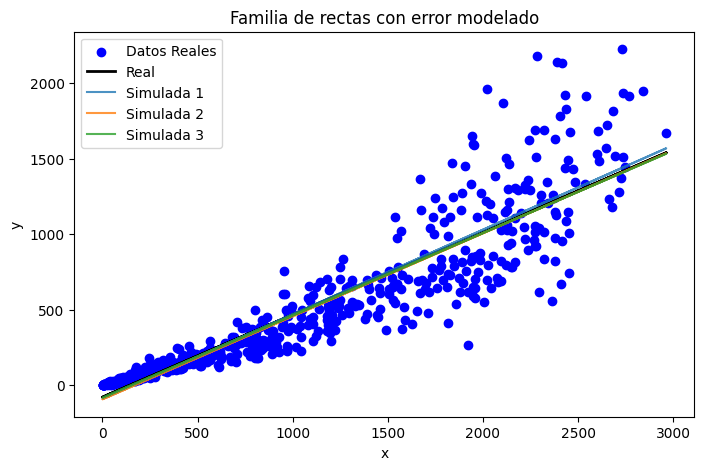

In [16]:
simulate_regression_lines(x, y, sigma, num_simulations=3)

In [17]:
#@title Prueba de hipótesis sobre $\beta1$
def pruebaHipotesis(x,B0,B1,std_B1,alpha):
  n = np.size(x)
  T = (B1 - 0)/(std_B1)
  print('T es', T)

  v = n-2
  t_medio = stats.t.ppf(1-alpha/2, v)
  print('el valor crítico es', t_medio)

  if abs(T)>t_medio:
    print('Se rechaza H0 bajo', alpha)
  else:
    print('No se rechaza H0 bajo', alpha)

In [18]:
pruebaHipotesis(x,B0,B1,std_B1,0.05)

T es 50.2457252977857
el valor crítico es 1.964391426166216
Se rechaza H0 bajo 0.05


# PREDICCIÓN PLAYOFFS 2023

### ¿Qué son los Playoffs de la NBA?

Los *Playoffs* de la NBA es una competición que comienza una vez finalizada la temporada regular, en la cual los equipos que obtuvieron los mejores registros de victorias y derrotas de cada conferencia (Este y Oeste) compiten por el campeonato.

En total, **16** equipos clasifican a los Playoffs, 8 por la Conferencia Este y 8 por la Conferencia Oeste.

Una vez definidos los equipos clasificados, se enfrentan en una serie de eliminación directa al mejor de siete partidos.

Las rondas son:

1. Primera Ronda (o Cuartos de Final de Conferencia)  
2. Semifinales de Conferencia  
3. Finales de Conferencia  
4. Finales de la NBA

El primer equipo que gane 4 juegos en cada serie avanza a la siguiente ronda, y el último equipo en pie se corona como campeón de la NBA.


![Playoffs](https://github.com/LauraCD2/estadisticos/blob/main/playoffs.png?raw=1)

### Objetivo (toca mejorar, solo puse la idea, falta parafraseada)

Mediante nuestro dataset, vamos a agrupar a los jugadores en los equipos que compitieron este torneo, y usaremos ciertas metricas para simular cada serie de dicho torneo, la intencion es comparar los resultados obtenidos, basados meramente en estadisticas de la temporada, con los resultados reales de los playoffs de ese año.

Con esto vemos si la dominancia de ciertos equipos mediante toda la temporada se vio reflejada en el torneo, además de que al ser un deporte, se creeria que no todo son las estadisticas, un equipo "peor" que otro puede dar la sorpresa y ganarle

### Equipos clasificados a los Playoffs 2023

\begin{array}{|c|l|l|}
\hline
\text{Puesto} & \text{Conferencia Este} & \text{Conferencia Oeste} \\
\hline
1 & \text{Milwaukee Bucks} & \text{Denver Nuggets} \\
2 & \text{Boston Celtics} & \text{Memphis Grizzlies} \\
3 & \text{Philadelphia 76ers} & \text{Sacramento Kings} \\
4 & \text{Cleveland Cavaliers} & \text{Phoenix Suns} \\
5 & \text{New York Knicks} & \text{Los Angeles Clippers} \\
6 & \text{Brooklyn Nets} & \text{Golden State Warriors} \\
7 & \text{Atlanta Hawks} & \text{Los Angeles Lakers} \\
8 & \text{Miami Heat} & \text{Minnesota Timberwolves} \\
\hline
\end{array}



In [19]:
#@title Agrupando por equipos
#@markdown Escogemos los primeros 15 jugadores de cada equipo ya que eston son los que más minutos jugaron.

#Este
Bucks = df[df['Team'] == 'MIL'][:15]
Celtics = df[df['Team'] == 'BOS'][:15]
Sixers = df[df['Team'] == 'PHI'][:15]
Cavaliers = df[df['Team'] == 'CLE'][:15]
Knicks = df[df['Team'] == 'NYK'][:15]
Nets = df[df['Team'] == 'BKN'][:15]
Hawks = df[df['Team'] == 'ATL'][:15]
Heat = df[df['Team'] == 'MIA'][:15]

#Oeste
Nuggets = df[df['Team'] == 'DEN'][:15]
Grizzlies = df[df['Team'] == 'MEM'][:15]
Kings = df[df['Team'] == 'SAC'][:15]
Suns = df[df['Team'] == 'PHX'][:15]
Clippers = df[df['Team'] == 'LAC'][:15]
Warriors = df[df['Team'] == 'GSW'][:15]
Lakers = df[df['Team'] == 'LAL'][:15]
Timberwolves = df[df['Team'] == 'MIN'][:15]

#@markdown Ejemplo: Los Angeles Lakers
Lakers


,PName,POS,Team,Age,GP,W,L,Min,PTS,FGM,...,REB,AST,TOV,STL,BLK,PF,FP,DD2,TD3,+/-
24,LeBron James,SF,LAL,38,55,30,25,1953.9,1590,609,...,457,375,178,50,32,88,2769,18,2,214
35,Anthony Davis,PF,LAL,30,56,31,25,1904.5,1451,542,...,702,148,122,59,114,146,2912,40,0,205
56,D'Angelo Russell,PG,LAL,27,71,39,32,2304.1,1263,445,...,215,437,186,70,29,140,2288,9,0,85
92,Malik Beasley,SG,LAL,26,81,45,36,2093.1,1025,370,...,283,124,90,65,9,107,1683,1,0,-87
118,Austin Reaves,SG,LAL,24,64,35,29,1843.2,833,259,...,193,215,99,33,19,108,1444,1,0,214
120,Dennis Schroder,PG,LAL,29,66,37,29,1985.9,830,270,...,165,298,112,50,10,145,1543,2,0,125
149,Rui Hachimura,PF,LAL,25,63,38,25,1466.0,707,284,...,283,58,53,19,26,72,1216,2,0,-28
173,Lonnie Walker IV,G,LAL,24,56,27,29,1297.0,654,236,...,109,64,46,30,17,71,976,0,0,-207
190,Jarred Vanderbilt,PF,LAL,24,78,43,35,1879.7,619,247,...,582,184,97,83,21,190,1808,10,0,-101
214,Troy Brown Jr.,SF,LAL,23,76,40,36,1859.8,541,200,...,308,95,49,59,16,120,1229,2,0,-15


### Sistema de puntuación
Para poder simular las series debemos asignar probabilidades, para esto cada equipo debe tener un puntaje del cual podamos basarnos, dicho puntaje se obtiene teniendo en cuenta lo siguiente para cada jugador:

-Puntos por partido

-Rebotes por partido

-Robos y bloqueos por partido

-Perdidas por partido (se restan)


Tomamos esos datos de cada jugador, le asignamos un peso diferente a cada uno y los sumamos, obteniendo un puntaje individual por jugador. Finalmente promediamos los puntajes de todos los jugadores obteniendo asi el puntaje del equipo.


In [22]:
def puntosEquipo(df):
  df['puntos_jugador'] = (
    ((df['PTS'] / df['GP']) * df['FG%']) * 0.35 +
    (df['REB'] / df['GP']) * 0.2 +
    ((df['STL'] + df['BLK']) / df['GP']) * 0.3 -
    (df['TOV'] / df['GP']) * 0.15)
  return df['puntos_jugador'].mean()

In [24]:
#@title Puntos de cada equipo
#Este
puntos_bucks = puntosEquipo(Bucks)
puntos_celtics = puntosEquipo(Celtics)
puntos_sixers = puntosEquipo(Sixers)
puntos_cavaliers = puntosEquipo(Cavaliers)
puntos_knicks = puntosEquipo(Knicks)
puntos_nets = puntosEquipo(Nets)
puntos_hawks = puntosEquipo(Hawks)
puntos_heat = puntosEquipo(Heat)
#Oeste
puntos_nuggets = puntosEquipo(Nuggets)
puntos_grizzlies = puntosEquipo(Grizzlies)
puntos_kings = puntosEquipo(Kings)
puntos_suns = puntosEquipo(Suns)
puntos_clippers = puntosEquipo(Clippers)
puntos_warriors = puntosEquipo(Warriors)
puntos_lakers = puntosEquipo(Lakers)
puntos_timberwolves = puntosEquipo(Timberwolves)

print('Puntos del equipo Bucks:', puntos_bucks)
print('Puntos del equipo Celtics:', puntos_celtics)
print('Puntos del equipo 6ers:', puntos_sixers)
print('Puntos del equipo Cavaliers:', puntos_cavaliers)
print('Puntos del equipo Knicks:', puntos_knicks)
print('Puntos del equipo Nets:', puntos_nets)
print('Puntos del equipo Hawks:', puntos_hawks)
print('Puntos del equipo Heat:', puntos_heat)
print('Puntos del equipo Nuggets:', puntos_nuggets)
print('Puntos del equipo Grizzlies:', puntos_grizzlies)
print('Puntos del equipo Kings:', puntos_kings)
print('Puntos del equipo Suns:', puntos_suns)
print('Puntos del equipo Clippers:', puntos_clippers)
print('Puntos del equipo Warriors:', puntos_warriors)
print('Puntos del equipo Lakers:', puntos_lakers)
print('Puntos del equipo Timberwolves:', puntos_timberwolves)


Puntos del equipo Bucks: 177.0288102192636
Puntos del equipo Celtics: 169.74063507287053
Puntos del equipo 6ers: 177.96173721631257
Puntos del equipo Cavaliers: 161.04649121824247
Puntos del equipo Knicks: 170.49259457441175
Puntos del equipo Nets: 164.3803284927431
Puntos del equipo Hawks: 177.66947924815588
Puntos del equipo Heat: 170.63020363510168
Puntos del equipo Nuggets: 190.0356973138452
Puntos del equipo Grizzlies: 183.45882485948627
Puntos del equipo Kings: 157.73908941314915
Puntos del equipo Suns: 190.39116303969078
Puntos del equipo Clippers: 201.19263667419844
Puntos del equipo Warriors: 178.9788432786887
Puntos del equipo Lakers: 198.68652026773583
Puntos del equipo Timberwolves: 176.2967356831052


Simulación de juego